In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from HelperFunctions import *
from PtOccupancyFunctions import *
import scipy.integrate
import pprint
import re

In [2]:
# path = "/home/helge/Applications/matsim/matsim-bimodal/scenarios/fine_grid/bimodal/output/merge/"
path = "/scratch01.local/hheuer/matsim-bimodal/scenarios/fine_grid/unimodal/output/100GridSpacingVaryReqs465FleetSize/"

In [3]:
# def getDirsFleetSizesNoDirHierarchy(directory, mode="bimodal"):
#     result = []
#     sub_dirs = []
# #     sdirs = [
# #         sdir.path
# #         for sdir in
# #             os.scandir(directory)
# #         if sdir.is_dir() and "drt" in sdir.name #Change
# #     ]

#     subresult = {}
#     subresult["root"] = directory
#     subroot = "unimodal"
#     root = directory
#     for entry in os.scandir(directory):
#         file = entry.name
#         if file=="0.trips.csv.gz" and mode in subroot:
#             subresult["trips"] = os.path.join(root, file)
#         if file=="0.vehicleDistanceStats_drt.csv" and mode in subroot:
#             subresult["drt_dists"] = os.path.join(root, file)
#         if file=="trip_success.csv.gz" and mode in subroot:
#             subresult["trip_success"] = os.path.join(root, file)
#         if file=="0.CummulativePtDistance.txt" and mode in subroot:
#             subresult["pt_dist"] = os.path.join(root, file)
#         if file=="0.drt_occupancy_time_profiles_drt.txt" and mode in subroot:
#             subresult["drt_occupancy"] = os.path.join(root, file)
#         if file=="0.occupancyAnalysis.txt" and mode in subroot:
#             subresult["pt_occupancy"] = os.path.join(root, file)
#         if file=="0.drt_trips_drt.csv" and mode in subroot:
#             subresult["drt_trips"] = os.path.join(root, file)
#         if file=="0.drt_detours_drt.csv" and mode in subroot:
#             subresult["drt_detours"] = os.path.join(root, file)
#         if file=="ph_modestats.txt" and mode in subroot:
#             subresult["ph_modestats"] = os.path.join(root, file)
#         if file=="pkm_modestats.txt" and mode in subroot:
#             subresult["pkm_modestats"] = os.path.join(root, file)
#     result.append(subresult)
#     return result
        
def getDirsFleetSizes(directory, mode="bimodal"):
    result = []
    sub_dirs = []
    sdirs = [
        sdir.path
        for sdir in
            os.scandir(directory)
        if sdir.is_dir() and "drt" in sdir.name #Change
    ]
                
    for sdir in sorted(sdirs, key=lambda x: int(re.search("\d+",x.split("/")[-1])[0])):
        subresult = {}
        subresult["root"] = sdir
        for root, subdirs, files in os.walk(sdir):
            subroot = root.replace(directory,"")
            for file in files:
                if file=="0.trips.csv.gz" and mode in subroot:
                    subresult["trips"] = os.path.join(root, file)
                if file=="0.vehicleDistanceStats_drt.csv" and mode in subroot:
                    subresult["drt_dists"] = os.path.join(root, file)
                if file=="trip_success.csv.gz" and mode in subroot:
                    subresult["trip_success"] = os.path.join(root, file)
                if file=="0.CummulativePtDistance.txt" and mode in subroot:
                    subresult["pt_dist"] = os.path.join(root, file)
                if file=="0.drt_occupancy_time_profiles_drt.txt" and mode in subroot:
                    subresult["drt_occupancy"] = os.path.join(root, file)
                if file=="0.occupancyAnalysis.txt" and mode in subroot:
                    subresult["pt_occupancy"] = os.path.join(root, file)
                if file=="0.drt_trips_drt.csv" and mode in subroot:
                    subresult["drt_trips"] = os.path.join(root, file)
                if file=="0.drt_detours_drt.csv" and mode in subroot:
                    subresult["drt_detours"] = os.path.join(root, file)
                if file=="ph_modestats.txt" and mode in subroot:
                    subresult["ph_modestats"] = os.path.join(root, file)
                if file=="pkm_modestats.txt" and mode in subroot:
                    subresult["pkm_modestats"] = os.path.join(root, file)
                    
        result.append(subresult)
    
    return result

def getCarDir(directory):
    result = {}
    result["root"] = getDir(directory, "car")
    for root, subdirs, files in os.walk(result["root"]):
        for file in files:
            if file=="0.trips.csv.gz":
                result["trips"] = os.path.join(root, file)
            if file=="trip_success.csv.gz" and "unimodal" not in root:
                result["trip_success"] = os.path.join(root, file)
    
    return result

def getDir(path, directory):
    for root, subdirs, files in os.walk(path):
        for subdir in subdirs:
            if subdir == directory:
                return os.path.join(root, subdir)

def getDirsReqs(path):
    result = {}
    for subdir in os.listdir(path):
        result[int(re.match("(\d*)reqs", subdir)[1])] = getDirsFleetSizes(os.path.join(path, subdir), mode="unimodal")
    return result

req_dirs = getDirsReqs(path)
pprint.pprint(req_dirs)
# car_dir = getCarDir(path)
n_sims = len(req_dirs)
print(n_sims)

{95000: [{'drt_detours': '/scratch01.local/hheuer/matsim-bimodal/scenarios/fine_grid/unimodal/output/100GridSpacingVaryReqs465FleetSize/95000reqs/465drt/unimodal/ITERS/it.0/0.drt_detours_drt.csv',
          'drt_dists': '/scratch01.local/hheuer/matsim-bimodal/scenarios/fine_grid/unimodal/output/100GridSpacingVaryReqs465FleetSize/95000reqs/465drt/unimodal/ITERS/it.0/0.vehicleDistanceStats_drt.csv',
          'drt_occupancy': '/scratch01.local/hheuer/matsim-bimodal/scenarios/fine_grid/unimodal/output/100GridSpacingVaryReqs465FleetSize/95000reqs/465drt/unimodal/ITERS/it.0/0.drt_occupancy_time_profiles_drt.txt',
          'drt_trips': '/scratch01.local/hheuer/matsim-bimodal/scenarios/fine_grid/unimodal/output/100GridSpacingVaryReqs465FleetSize/95000reqs/465drt/unimodal/ITERS/it.0/0.drt_trips_drt.csv',
          'ph_modestats': '/scratch01.local/hheuer/matsim-bimodal/scenarios/fine_grid/unimodal/output/100GridSpacingVaryReqs465FleetSize/95000reqs/465drt/unimodal/ph_modestats.txt',
         

          'pt_dist': '/scratch01.local/hheuer/matsim-bimodal/scenarios/fine_grid/unimodal/output/100GridSpacingVaryReqs465FleetSize/99510reqs/465drt/unimodal/ITERS/it.0/0.CummulativePtDistance.txt',
          'root': '/scratch01.local/hheuer/matsim-bimodal/scenarios/fine_grid/unimodal/output/100GridSpacingVaryReqs465FleetSize/99510reqs/465drt',
          'trip_success': '/scratch01.local/hheuer/matsim-bimodal/scenarios/fine_grid/unimodal/output/100GridSpacingVaryReqs465FleetSize/99510reqs/465drt/unimodal/trip_success.csv.gz',
          'trips': '/scratch01.local/hheuer/matsim-bimodal/scenarios/fine_grid/unimodal/output/100GridSpacingVaryReqs465FleetSize/99510reqs/465drt/unimodal/ITERS/it.0/0.trips.csv.gz'}],
 99520: [{'drt_detours': '/scratch01.local/hheuer/matsim-bimodal/scenarios/fine_grid/unimodal/output/100GridSpacingVaryReqs465FleetSize/99520reqs/465drt/unimodal/ITERS/it.0/0.drt_detours_drt.csv',
          'drt_dists': '/scratch01.local/hheuer/matsim-bimodal/scenarios/fine_grid/un

           'trips': '/scratch01.local/hheuer/matsim-bimodal/scenarios/fine_grid/unimodal/output/100GridSpacingVaryReqs465FleetSize/100110reqs/465drt/unimodal/ITERS/it.0/0.trips.csv.gz'}],
 100120: [{'drt_detours': '/scratch01.local/hheuer/matsim-bimodal/scenarios/fine_grid/unimodal/output/100GridSpacingVaryReqs465FleetSize/100120reqs/465drt/unimodal/ITERS/it.0/0.drt_detours_drt.csv',
           'drt_dists': '/scratch01.local/hheuer/matsim-bimodal/scenarios/fine_grid/unimodal/output/100GridSpacingVaryReqs465FleetSize/100120reqs/465drt/unimodal/ITERS/it.0/0.vehicleDistanceStats_drt.csv',
           'drt_occupancy': '/scratch01.local/hheuer/matsim-bimodal/scenarios/fine_grid/unimodal/output/100GridSpacingVaryReqs465FleetSize/100120reqs/465drt/unimodal/ITERS/it.0/0.drt_occupancy_time_profiles_drt.txt',
           'drt_trips': '/scratch01.local/hheuer/matsim-bimodal/scenarios/fine_grid/unimodal/output/100GridSpacingVaryReqs465FleetSize/100120reqs/465drt/unimodal/ITERS/it.0/0.drt_trips_drt.c

           'ph_modestats': '/scratch01.local/hheuer/matsim-bimodal/scenarios/fine_grid/unimodal/output/100GridSpacingVaryReqs465FleetSize/100820reqs/465drt/unimodal/ph_modestats.txt',
           'pkm_modestats': '/scratch01.local/hheuer/matsim-bimodal/scenarios/fine_grid/unimodal/output/100GridSpacingVaryReqs465FleetSize/100820reqs/465drt/unimodal/pkm_modestats.txt',
           'pt_dist': '/scratch01.local/hheuer/matsim-bimodal/scenarios/fine_grid/unimodal/output/100GridSpacingVaryReqs465FleetSize/100820reqs/465drt/unimodal/ITERS/it.0/0.CummulativePtDistance.txt',
           'root': '/scratch01.local/hheuer/matsim-bimodal/scenarios/fine_grid/unimodal/output/100GridSpacingVaryReqs465FleetSize/100820reqs/465drt',
           'trip_success': '/scratch01.local/hheuer/matsim-bimodal/scenarios/fine_grid/unimodal/output/100GridSpacingVaryReqs465FleetSize/100820reqs/465drt/unimodal/trip_success.csv.gz',
           'trips': '/scratch01.local/hheuer/matsim-bimodal/scenarios/fine_grid/unimodal/out

           'root': '/scratch01.local/hheuer/matsim-bimodal/scenarios/fine_grid/unimodal/output/100GridSpacingVaryReqs465FleetSize/104700reqs/465drt',
           'trip_success': '/scratch01.local/hheuer/matsim-bimodal/scenarios/fine_grid/unimodal/output/100GridSpacingVaryReqs465FleetSize/104700reqs/465drt/unimodal/trip_success.csv.gz',
           'trips': '/scratch01.local/hheuer/matsim-bimodal/scenarios/fine_grid/unimodal/output/100GridSpacingVaryReqs465FleetSize/104700reqs/465drt/unimodal/ITERS/it.0/0.trips.csv.gz'}],
 104800: [{'drt_detours': '/scratch01.local/hheuer/matsim-bimodal/scenarios/fine_grid/unimodal/output/100GridSpacingVaryReqs465FleetSize/104800reqs/465drt/unimodal/ITERS/it.0/0.drt_detours_drt.csv',
           'drt_dists': '/scratch01.local/hheuer/matsim-bimodal/scenarios/fine_grid/unimodal/output/100GridSpacingVaryReqs465FleetSize/104800reqs/465drt/unimodal/ITERS/it.0/0.vehicleDistanceStats_drt.csv',
           'drt_occupancy': '/scratch01.local/hheuer/matsim-bimodal/sc

In [4]:
# print(req_dirs[50000])

In [5]:
def getTrips(paths, mode):
    if mode == "bimodal":
        columns=["person","trav_time","wait_time","traveled_distance","modes"]
    elif mode == "unimodal":
        columns=["person","trav_time","wait_time"]
    elif mode == "car":
        columns=["person", "traveled_distance", "trav_time"]
    path = paths["trips"]
    df = pd.read_csv(path, sep=";").loc[:,columns]
    df["trav_time"] = df["trav_time"].apply(timestmp2sec)
    df.set_index("person", inplace=True)
    if mode=="car":
        df = df.groupby("person").agg(
            {
                "trav_time": np.sum,
                "traveled_distance": np.sum
            }
        )
        return df
    df["wait_time"] = df["wait_time"].apply(timestmp2sec)
    if mode=="unimodal":
        df = df.groupby("person").agg(
            {
                "trav_time": np.sum,
                "wait_time": np.sum,
            }
        )
        return df
    if mode == "bimodal":
        df = df.groupby("person").agg(
            {
                "trav_time": np.sum,
                "wait_time": np.sum,
                "traveled_distance": np.sum,
                "modes": combineModesSeriesStr,
            }
        )
        return df
    
def getFleetSize(path):
    return re.search("\d+", path.split("/")[-1])[0]

def getEll(path):
    return path.split("/")[-1].split("_")[-1]

def getModeStats(paths, columns_ph, columns_pkm):
    path_ph = paths["ph_modestats"]
    path_pkm = paths["pkm_modestats"]
    df_ph = pd.read_csv(path_ph, sep='\t').loc[:,columns_ph]
    df_pkm = pd.read_csv(path_pkm, sep='\t').loc[:,columns_pkm]
    return df_ph.to_numpy()[0], df_pkm.to_numpy()[0]

def getDrtVehicleDistances(paths):
    path = paths["drt_dists"]
    df = pd.read_csv(path, sep=";")["drivenDistance_m"]
    return df

def getTripSuccess(paths):
    path = paths["trip_success"]
    df = pd.read_csv(path, sep=";", index_col="personId")
    return df

def getCummulativePtDistance(paths):
    path = paths["pt_dist"]
    df = pd.read_csv(path).values[0, 0]
    return df

def getDrtOccupandyAndStandingFrac(paths, exclude_empty_vehicles, count_idle_vehicles=False):
    path = paths["drt_occupancy"]
    df = pd.read_csv(path, sep="\t")
    df["time"] = df["time"].apply(timestmphm2sec)
    drt_occ, drt_deviation = getAverageOcc(
        df.drop(columns="time"), exclude_empty_vehicles=exclude_empty_vehicles, count_idle_vehicles=count_idle_vehicles
    )
    drt_standing_frac = getStandingFraction(df.drop(columns="time"))
    return drt_occ, drt_standing_frac

def getPtOccupancy(paths):
    path = paths["pt_occupancy"]
    av_pt_occ, av_pt_occ_sq, n_pt = getPtOccupancies(
        path, 600
    )
    t_av_pt_occ_av = getAverageTimeSeries(av_pt_occ)
    sigma = np.sqrt(n_pt / (n_pt - 1)) * np.sqrt(
        av_pt_occ_sq - av_pt_occ ** 2
    )
    t_av_pt_occ_sigma = getAverageTimeSeries(sigma)
    return t_av_pt_occ_av, t_av_pt_occ_sigma

def getDrtTrips(paths):
    path = paths["drt_trips"]
    df = pd.read_csv(path, sep=";").loc[:, ["personId", "travelDistance_m", "waitTime"]]
    df.set_index("personId", inplace=True)
    df = df.groupby("personId").agg(
        {
            "waitTime": np.sum,
            "travelDistance_m": np.sum,
        }
    )
    return df

def getDrtDetours(paths):
    path = paths["drt_detours"]
    df = pd.read_csv(path, sep=";").loc[
        :, "distanceDetour"
    ]
    df = df[df < 10]
    return df

# display(getTrips(bim_dirs[0], "bimodal"))

In [6]:
data = []

for reqs, drt_dic_list in req_dirs.items():
    for i, dic in enumerate(drt_dic_list):
        data.append([])
        data[-1].append(reqs)
        data[-1].append(getFleetSize(dic["root"]))
        
#         trips = getTrips(dic, "unimodal")
#         drt_trips = getDrtTrips(dic)
        trip_succ = getTripSuccess(dic)
#         av_drt_occs_non_standing[i], standing_fractions[i] = getDrtOccupandyAndStandingFrac(dic, False)
#         av_drt_occs_non_empty[i], _ = getDrtOccupandyAndStandingFrac(dic, True)
#         av_drt_occs[i], _ = getDrtOccupandyAndStandingFrac(dic, False, True)
#         drt_detours = getDrtDetours(dic)
#         cummulative_drt_bimodal[i] = getDrtVehicleDistances(dic).sum()
#         serviced_fracts[i] = len(trip_succ[trip_succ["tripSuccess"]]) / len(trip_succ)
        data[-1].append(1-len(trip_succ[trip_succ["tripSuccess"]]) / len(trip_succ))
#         print("rejection_rate: ", serviced_fracts[i])
#         av_detours[i] = drt_detours.mean()
#         tt_bimodal[i] = trips["trav_time"].mean()
#         wait_times[i] = trips["wait_time"].mean()
#         wait_times_drt[i] = drt_trips["waitTime"].mean()

        print("Rejection Rate: {}".format(data[-1]))
    print("......")

Rejection Rate: [100450, '465', 0.06709805873568941]
......
Rejection Rate: [96300, '465', 0.0]
......
Rejection Rate: [103000, '465', 0.11363106796116507]
......
Rejection Rate: [101100, '465', 0.09057368941641941]
......
Rejection Rate: [100740, '465', 0.08164582092515382]
......
Rejection Rate: [108300, '465', 0.1651892890120037]
......
Rejection Rate: [99730, '465', 0.0]
......
Rejection Rate: [107200, '465', 0.15832089552238804]
......
Rejection Rate: [100160, '465', 0.032158546325878556]
......
Rejection Rate: [95170, '465', 0.0]
......
Rejection Rate: [105300, '465', 0.14415954415954413]
......
Rejection Rate: [99200, '465', 0.0]
......
Rejection Rate: [100270, '465', 0.07356138426249126]
......
Rejection Rate: [100850, '465', 0.08158651462568167]
......
Rejection Rate: [99820, '465', 0.07237026647966338]
......
Rejection Rate: [100700, '465', 0.05433962264150949]
......
Rejection Rate: [95400, '465', 0.0]
......
Rejection Rate: [99770, '465', 0.0]
......
Rejection Rate: [106800

Rejection Rate: [99910, '465', 0.0165448904013612]
......
Rejection Rate: [100630, '465', 0.06800158998310646]
......
Rejection Rate: [100280, '465', 0.022556840845632253]
......
Rejection Rate: [104100, '465', 0.13389048991354469]
......
Rejection Rate: [98000, '465', 0.0]
......
Rejection Rate: [99640, '465', 0.0]
......
Rejection Rate: [95180, '465', 0.0]
......
Rejection Rate: [100190, '465', 0.0]
......
Rejection Rate: [100520, '465', 0.07366693195384]
......
Rejection Rate: [99550, '465', 0.0]
......
Rejection Rate: [106000, '465', 0.14854716981132077]
......
Rejection Rate: [95000, '465', 0.0]
......
Rejection Rate: [100300, '465', 0.06953140578265204]
......
Rejection Rate: [99950, '465', 0.01159579789894949]
......
Rejection Rate: [102200, '465', 0.10187866927592959]
......
Rejection Rate: [97100, '465', 0.0]
......
Rejection Rate: [100010, '465', 0.0090490950904909]
......
Rejection Rate: [107700, '465', 0.16116991643454037]
......
Rejection Rate: [101800, '465', 0.0961296660

In [7]:
df = pd.DataFrame(data, columns=["requests", "fleet_size", "rejection_rate"])
df["requests"] = df["requests"].astype(np.int64)
df["fleet_size"] = df["fleet_size"].astype(np.int64)
df["rejection_rate"] = df["rejection_rate"].astype(np.float64)
df.sort_values(["requests", "fleet_size"], inplace=True)
req_list = df["requests"].unique()
fleet_list = df["fleet_size"].unique()
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(df)

In [8]:
print(df)

     requests  fleet_size  rejection_rate
163     95000         465        0.000000
269     95010         465        0.000000
99      95020         465        0.000000
63      95030         465        0.000000
148     95040         465        0.000000
..        ...         ...             ...
214    108500         465        0.167677
183    108600         465        0.169797
149    108700         465        0.171969
244    108800         465        0.171765
209    108900         465        0.170083

[275 rows x 3 columns]


In [9]:
# cummulative_car_dist = 1
# tt_car = 1
# cummulative_drt_bimodal_rescaled = cummulative_drt_bimodal / cummulative_car_dist
# tt_bimodal_rescaled = tt_bimodal / tt_car
# wait_times_rescaled = wait_times / tt_car

<IPython.core.display.Javascript object>


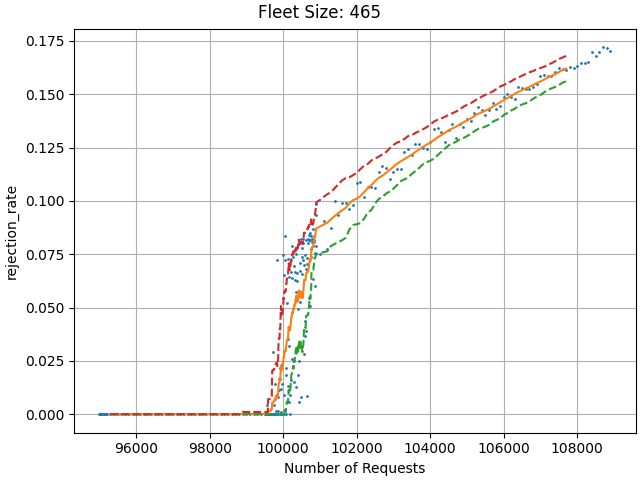

In [15]:
%matplotlib notebook

def window(size):
    return np.ones(size)/size

w_size = 25
assert w_size % 2 == 1 , "w_size should be odd for convolution to make sense with same \"x\" values"

fig, ax = plt.subplots(constrained_layout=True)

ax.plot(df["requests"], df["rejection_rate"], "o", ms=1, lw=1)
run_av = np.convolve(df["rejection_rate"], window(w_size), "valid")
run_av_sq = np.convolve(df["rejection_rate"]**2, window(w_size), "valid")
std_dev = np.sqrt(run_av_sq-run_av**2)
ax.plot(df["requests"][(w_size//2):-(w_size//2)], run_av)
ax.plot(df["requests"][(w_size//2):-(w_size//2)], np.maximum(0,run_av-std_dev), ls='--')
ax.plot(df["requests"][(w_size//2):-(w_size//2)], run_av+std_dev, ls='--')

# ax.set_xscale("log")
ax.set_xlabel("Number of Requests")
fig.suptitle("Fleet Size: 465")
# ax.set_xlabel("Request Frequency")
ax.set_ylabel("rejection_rate")
# ax.set_ylabel("Servability")
# ax.set_ylim(0,1)
# ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.grid()

# fig.savefig("figures/VaryReqs.jpg", dpi=200)
plt.show()

---

In [ ]:
fig, ax = plt.subplots(constrained_layout=True)

ax.plot(fleet_list, av_drt_occs, 'o-')

ax.set_xlabel("Fleet Size")

plt.show()

In [ ]:
fig, ax = plt.subplots(constrained_layout=True)

ax.plot(fleet_list, av_detours, 'o-')

ax.set_xlabel("Fleet Size")

plt.show()

In [ ]:
fig, ax = plt.subplots(constrained_layout=True)

ax.plot(fleet_list, av_drt_occs/av_detours, 'o-')

ax.set_xlabel("Fleet Size")

plt.show()

In [ ]:
fig, ax = plt.subplots(constrained_layout=True)

#Normalize by TT for private car
ax.plot(fleet_list, tt_bimodal_rescaled, 'o-')

ax.set_xlabel("Fleet Size")

plt.show()

In [ ]:
fig, ax = plt.subplots(constrained_layout=True)

#Normalize by TT for private car
ax.plot(fleet_list, wait_times_rescaled, 'o-')

ax.set_xlabel("Fleet Size")

plt.show()

In [ ]:
fig, ax = plt.subplots(constrained_layout=True)

ax.plot(fleet_list, standing_fractions, 'o-')

ax.set_xlabel("Fleet Size")

plt.show()

In [ ]:
fig, ax = plt.subplots(constrained_layout=True)

ax.plot(fleet_list, cummulative_drt_bimodal_rescaled, 'o-')

ax.set_xlabel("Fleet Size")

plt.show()

In [ ]:
def isParetoEfficient(costs):
    is_efficient = np.ones(costs.shape[0], dtype = bool)
    for i, c in enumerate(costs):
        is_efficient[i] = np.all(np.any(costs[:i]>c, axis=1)) and np.all(np.any(costs[i+1:]>c, axis=1))
    return is_efficient

In [ ]:
costs = np.stack((cummulative_drt_bimodal_rescaled, tt_bimodal_rescaled), axis=1)

In [ ]:
%matplotlib inline

pareto_efficient = isParetoEfficient(costs)
fig, ax = plt.subplots(constrained_layout=True)

scatter = ax.scatter(cummulative_drt_bimodal_rescaled, tt_bimodal_rescaled, c=pareto_efficient)
# ax.plot(cummulative_drt_bimodal_rescaled, tt_bimodal_rescaled)
handles, labels = scatter.legend_elements()
labels = ["pareto unoptimal", "pareto optimal"]

ax.set_xlabel("driven_distance_bimodal / driven_distance_car")
ax.set_ylabel("tt_bimodal / tt_car")
ax.legend(handles, labels)
# fig.colorbar(scatter)

plt.show()

In [ ]:
x = np.linspace(0.0001,10,100)
y = np.sqrt(x)
log_x = np.log(x)
log_y = np.log(y)

plt.figure()

plt.plot(log_x,log_y)
plt.grid()

plt.show()

print("Exp: 1/2")